In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_excel("C:\\Users\\oem\\datasets\\iris-dataset.xlsx", header = 0)


In [3]:
data = np.array(df, dtype=np.float32)

y_data = data[:, [-1]]

scaler = MinMaxScaler()
data1 = scaler.fit_transform(df.values)

x_data = data1[:, 0:-1]  


In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_data, y_data)
iris_lda = lda.transform(x_data)

lda_columns = ['LD_1', 'LD_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
print (lda.explained_variance_ratio_)
print (irisDF_lda)

[0.9912126 0.0087874]
         LD_1      LD_2
0    8.061800  0.300421
1    7.128688 -0.786660
2    7.489828 -0.265384
3    6.813201 -0.670631
4    8.132309  0.514463
..        ...       ...
145 -5.645003  1.677717
146 -5.179565 -0.363475
147 -4.967741  0.821141
148 -5.886145  2.345091
149 -4.683154  0.332034

[150 rows x 2 columns]


C:\Users\oem\.conda\envs\TF_v2\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
irisDF_lda['target']=y_data
print (irisDF_lda)

         LD_1      LD_2  target
0    8.061800  0.300421     0.0
1    7.128688 -0.786660     0.0
2    7.489828 -0.265384     0.0
3    6.813201 -0.670631     0.0
4    8.132309  0.514463     0.0
..        ...       ...     ...
145 -5.645003  1.677717     2.0
146 -5.179565 -0.363475     2.0
147 -4.967741  0.821141     2.0
148 -5.886145  2.345091     2.0
149 -4.683154  0.332034     2.0

[150 rows x 3 columns]


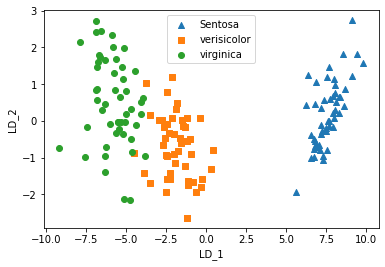

In [7]:
markers = ['^', 's', 'o']
target_names = ['Sentosa','verisicolor','virginica']

for i, marker in enumerate (markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['LD_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['LD_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = target_names[i])
    
plt.legend()
plt.xlabel('LD_1')
plt.ylabel('LD_2')
plt.show()